#### Loading Necessary Libraries
---

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading and Cleaning frame
---

In [23]:
# loading and removing initial values
missing_values = [" ?"]
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None, na_values = missing_values)

In [24]:
data.head()

# re-labeling columns as per UC Irvine ML dataset column order
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex", "capital-gain",
           "capital-loss", "hours-per-week", "native-country", "income"]
data.columns = columns
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Calculating Summary Statistics
---

#### Part I
Question 1.

In [25]:
# summary statistics of all continuous variables
for c in data.columns:
    if pd.api.types.is_any_real_numeric_dtype(data[c]):
        print(f"{c} sumary:")
        display(data[c].describe())

age sumary:


count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

fnlwgt sumary:


count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

education-num sumary:


count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

capital-gain sumary:


count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

capital-loss sumary:


count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

hours-per-week sumary:


count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [26]:
data[['education', 'education-num']].sort_values(by='education-num').drop_duplicates()

,education,education-num
32359,Preschool,1
26995,1st-4th,2
28586,5th-6th,3
4281,7th-8th,4
28582,9th,5
4288,10th,6
15396,11th,7
32535,12th,8
32529,HS-grad,9
14755,Some-college,10


Question 2.

In [27]:
# calculating unique value frequencies for discrete features 
for c in data.columns:
    if not(pd.api.types.is_any_real_numeric_dtype(data[c])):
        print(f"{c} value unque value counts:")
        display(data[c].value_counts())

workclass value unque value counts:


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education value unque value counts:


education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

marital-status value unque value counts:


marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation value unque value counts:


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

relationship value unque value counts:


relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

race value unque value counts:


race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

sex value unque value counts:


sex
Male      21790
Female    10771
Name: count, dtype: int64

native-country value unque value counts:


native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

income value unque value counts:


income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Visualizations
---

Question 3.

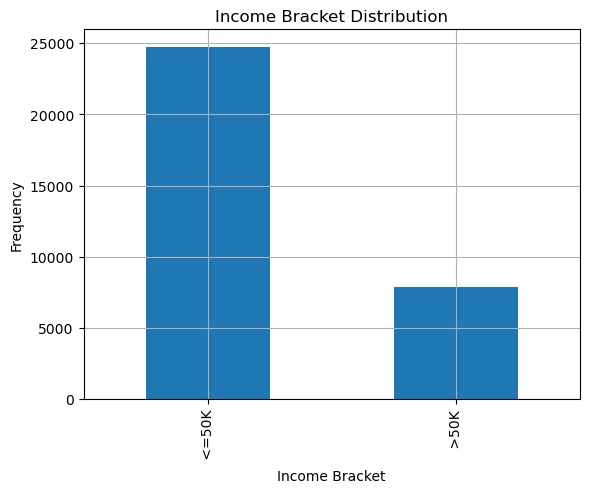

In [96]:
# a bar chart is an effective way to visualize income bracket distribution
data['income'].value_counts().plot(kind='bar', xlabel='Income Bracket', ylabel="Frequency", title='Income Bracket Distribution',
                                   grid=True)
plt.show()

Question 4.

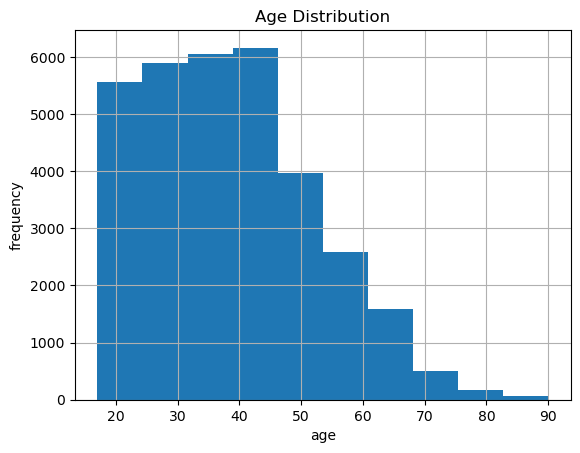

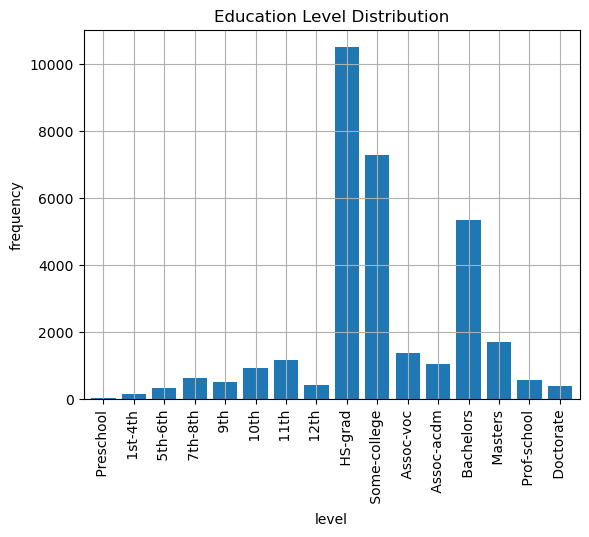

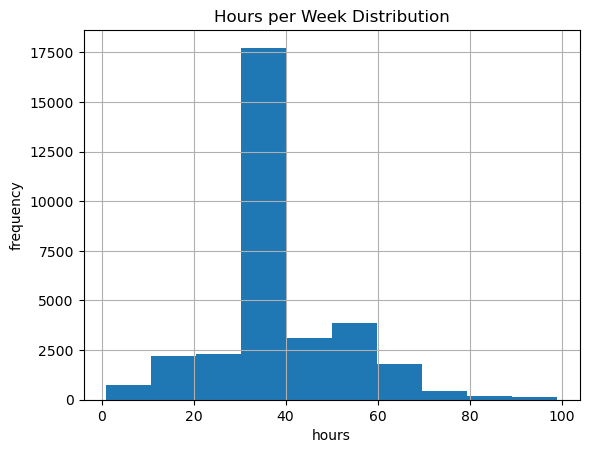

In [101]:
# gaining more insight into the distribution of age, education level and hours worked
data['age'].plot(kind='hist', xlabel='age', ylabel="frequency", title='Age Distribution',
                                   grid=True)
plt.show()
edu_bar = data['education-num'].value_counts().sort_index().plot(kind='bar', xlabel='level', ylabel="frequency", title='Education Level Distribution',
                                   grid=True, width=0.8)
edu_bar.set_xticklabels(data[['education','education-num']].sort_values(by='education-num')['education'].unique())
plt.show()
data['hours-per-week'].plot(kind='hist', xlabel='hours', ylabel="frequency", title='Hours per Week Distribution',
                                   grid=True, bins=10)
plt.show()

Question 5.

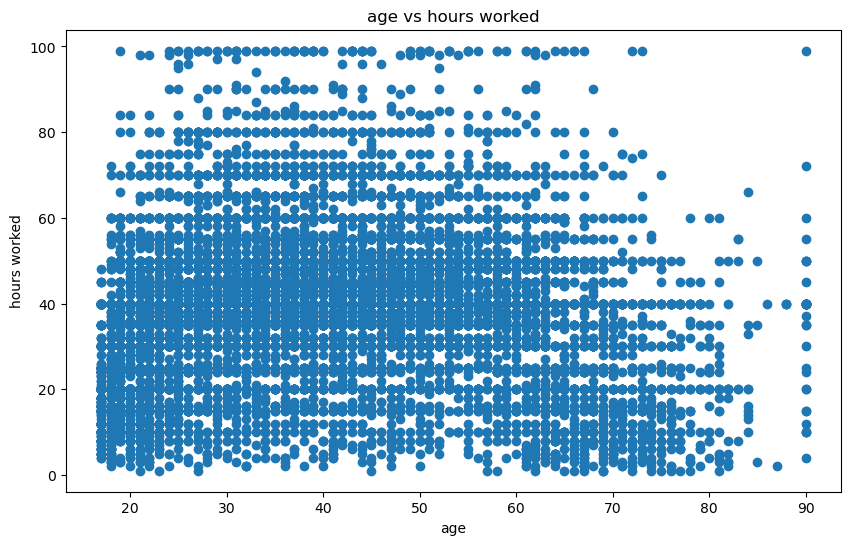

In [30]:
# lets visualize how age relates to hours worked and education level
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(x=data['age'], y=data['hours-per-week'])
ax.set_xlabel("age")
ax.set_ylabel("hours worked")
ax.set_title("age vs hours worked")
plt.show()


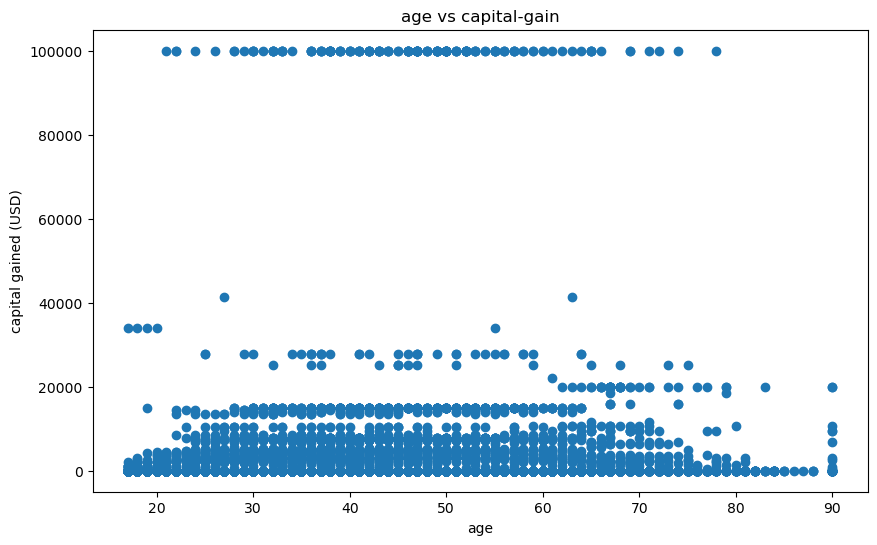

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(x=data['age'], y=data['capital-gain'])
ax.set_xlabel("age")
ax.set_ylabel('capital gained (USD)')
ax.set_title("age vs capital-gain")
plt.show()


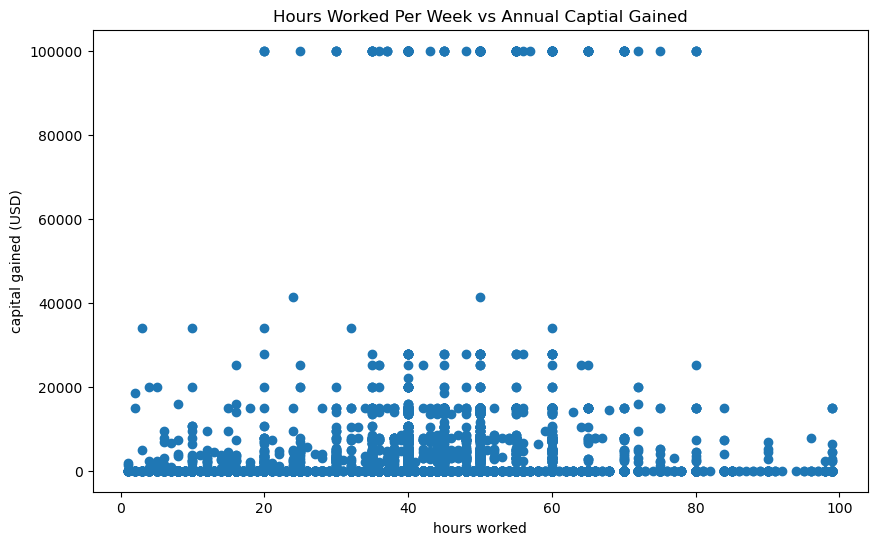

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(x=data['hours-per-week'], y=data['capital-gain'])
ax.set_xlabel("hours worked")
ax.set_ylabel('capital gained (USD)')
ax.set_title("Hours Worked Per Week vs Annual Captial Gained")
plt.show()

Question 6.

In [33]:
# lets standardize some of the features and create a new dataframe so that the parallel diagram is more readable
stdzd_hrs = (data['hours-per-week']-data['hours-per-week'].mean())/data['hours-per-week'].std()
stdzd_education = (data['education-num']-data['education-num'].mean())/data['education-num'].std()
stdzd_age = (data['age']-data['age'].mean())/data['age'].std()
stdzd_data = pd.DataFrame({
    'age': stdzd_age,
    'education-num': stdzd_education,
    'hours_worked': stdzd_hrs,
    'sex': data['sex']
})

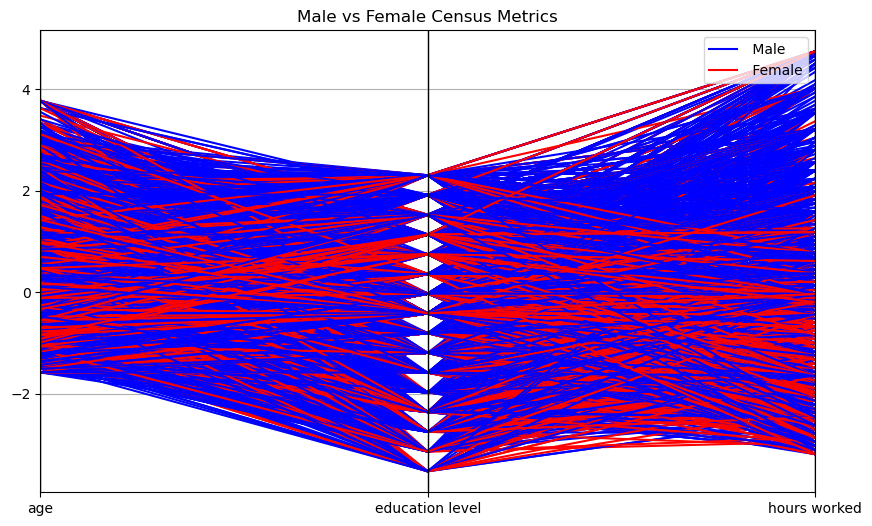

In [102]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax = pd.plotting.parallel_coordinates(stdzd_data, 'sex', color=['blue','red'])
ax.set_title("Male vs Female Census Metrics")
ax.set_xticklabels(['age', 'education level', 'hours worked'])
plt.show()

### Handling Missing Data
--- 

#### Part II

In [89]:
# determining features with missing values
nan_attributes = data.columns[data.isna().any()]
nan_attributes

Index(['workclass', 'occupation', 'native-country'], dtype='object')

#### Feature distribution before filling in missing values

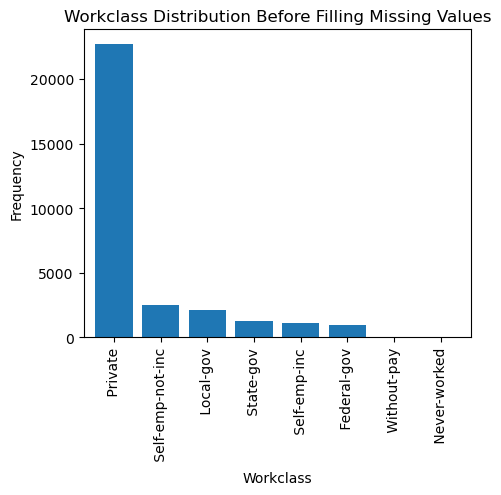

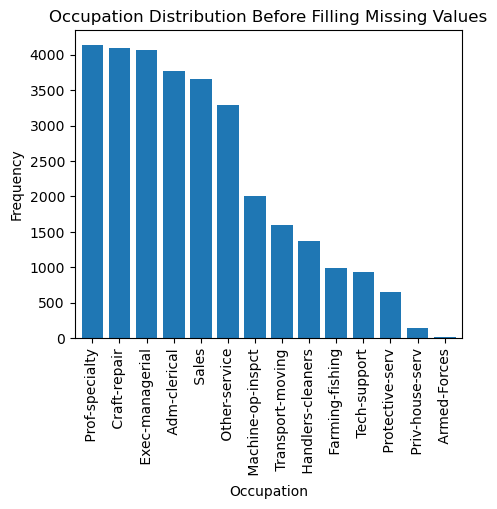

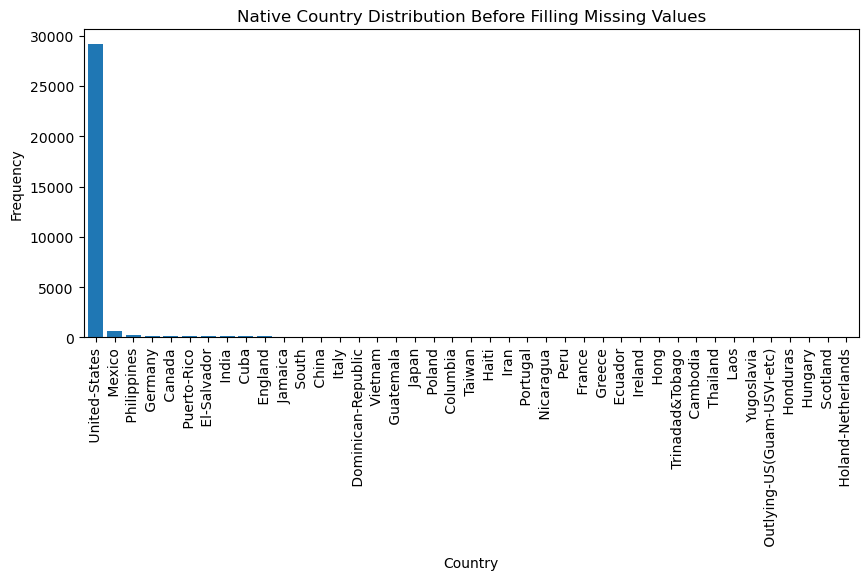

In [90]:
# feature distributions with missing values ignored
data['workclass'].value_counts().plot(kind='bar', title='Workclass Distribution Before Filling Missing Values',
                                      xlabel='Workclass', ylabel='Frequency', figsize=(5,4), width=0.8)
plt.show()

data['occupation'].value_counts().plot(kind='bar', title='Occupation Distribution Before Filling Missing Values',
                                      xlabel='Occupation', ylabel='Frequency', figsize=(5,4), width=0.8)
plt.show()

data['native-country'].value_counts().plot(kind='bar', title='Native Country Distribution Before Filling Missing Values',
                                      xlabel='Country', ylabel='Frequency', figsize=(10,4), width=0.8)
plt.show()

#### Replacing NaN values with mode of attribute

Question 1.

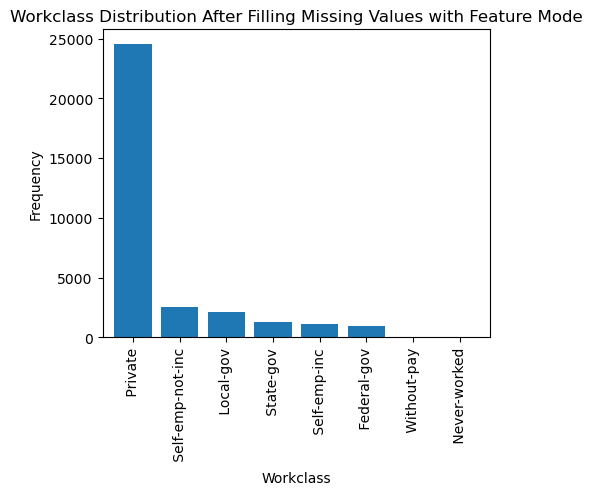

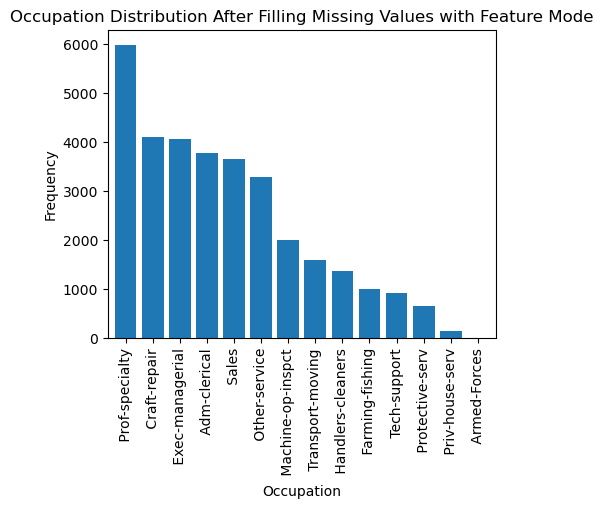

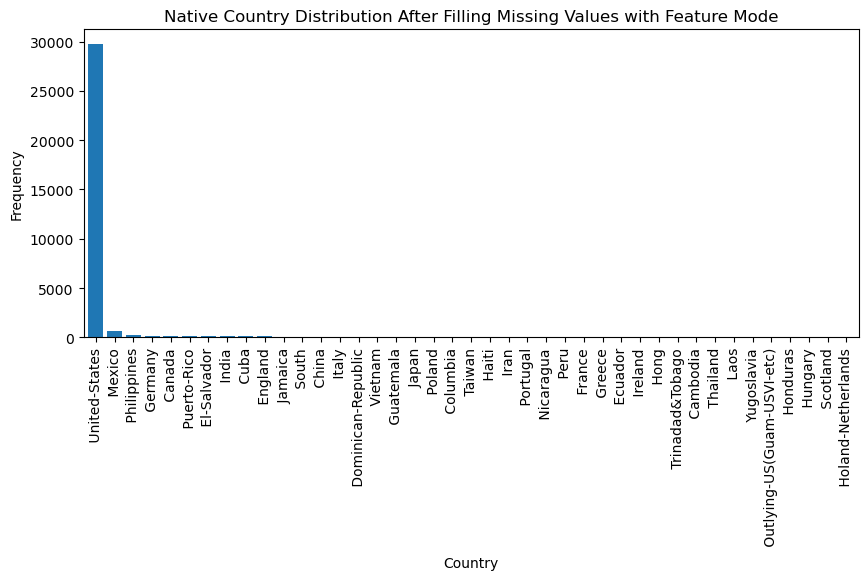

In [91]:
# since all features with missing attributes are categorical, we replace nan values with the mode of the feature
workclass_mode = data['workclass'].mode()[0]
occupation_mode = data['occupation'].mode()[0]
nat_country_mode = data['native-country'].mode()[0]

nafilled_workclass = data['workclass'].fillna(workclass_mode, inplace=False)
nafilled_occupation = data['occupation'].fillna(occupation_mode, inplace=False)
nafilled_nat_country = data['native-country'].fillna(nat_country_mode, inplace=False)

# feature distributions with missing values filled 
nafilled_workclass.value_counts().plot(kind='bar', title='Workclass Distribution After Filling Missing Values with Feature Mode',
                                      xlabel='Workclass', ylabel='Frequency', figsize=(5,4), width=0.8)
plt.show()

nafilled_occupation.value_counts().plot(kind='bar', title='Occupation Distribution After Filling Missing Values with Feature Mode',
                                      xlabel='Occupation', ylabel='Frequency', figsize=(5,4), width=0.8)
plt.show()

nafilled_nat_country.value_counts().plot(kind='bar', title='Native Country Distribution After Filling Missing Values with Feature Mode',
                                      xlabel='Country', ylabel='Frequency', figsize=(10,4), width=0.8)
plt.show()

#### Replacing NaN values with mode/mean based on attribute dtype and class value of Nan instance

Question 2.

In [93]:
# this function will replace all nan values by their feature mode/mean (based on discrete/continuous features) for the class to which the nan instance
# belongs
def filna_by_class(data, class_attr):
    
    frame = data.copy(deep=True)
    nan_attributes = frame.columns[frame.isna().any()]
    class_value_dfs = {}
    
    unique_classes = frame[class_attr].unique()
    for x in unique_classes:
        class_value_dfs[x] = frame[frame[class_attr] == x]
        
    for c in nan_attributes:
        for i in frame[frame[c].isna()].index:
            i_class = frame.loc[i,'income']
            if pd.api.types.is_any_real_numeric_dtype(frame[c]):
                frame.loc[i,c] = class_value_dfs[i_class][c].mean()[0]
            else:
                frame.loc[i,c] = class_value_dfs[i_class][c].mode()[0]
    
    return frame

In [108]:
# filling missing values based on missing instance class
nonan_data = filna_by_class(data, 'income')

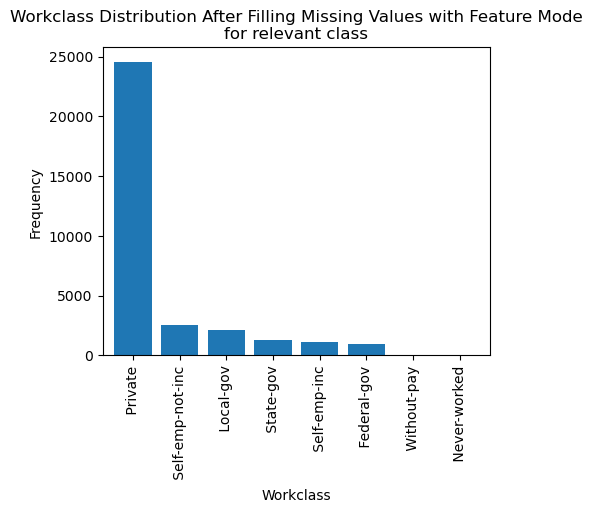

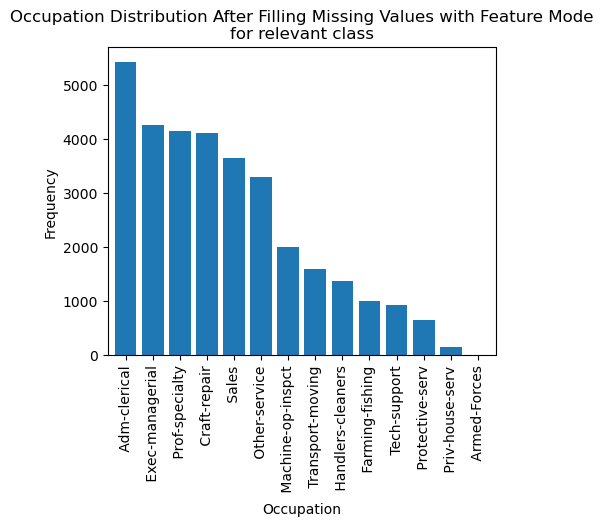

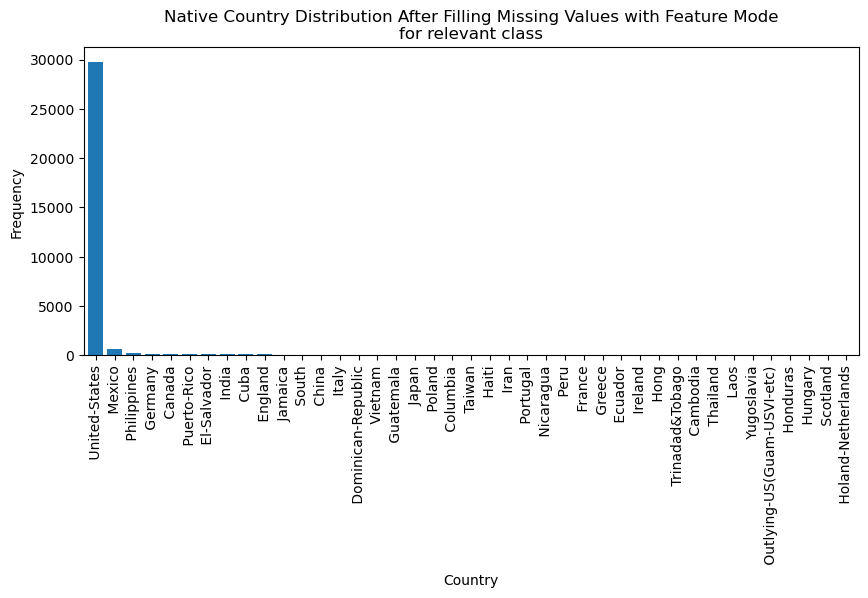

In [109]:
nonan_data['workclass'].value_counts().plot(kind='bar', title='Workclass Distribution After Filling Missing Values with Feature Mode\nfor relevant class',
                                      xlabel='Workclass', ylabel='Frequency', figsize=(5,4), width=0.8)
plt.show()

nonan_data['occupation'].value_counts().plot(kind='bar', title='Occupation Distribution After Filling Missing Values with Feature Mode\nfor relevant class',
                                      xlabel='Occupation', ylabel='Frequency', figsize=(5,4), width=0.8)
plt.show()

nonan_data['native-country'].value_counts().plot(kind='bar', title='Native Country Distribution After Filling Missing Values with Feature Mode\nfor relevant class',
                                      xlabel='Country', ylabel='Frequency', figsize=(10,4), width=0.8)
plt.show()